# DOMAIN: Botanical Research

## • CONTEXT: University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo.

## • DATA DESCRIPTION: The dataset comprises of images from 12 plant species.
Source: https://www.kaggle.com/c/plant-seedlings-classification/data.

## • PROJECT OBJECTIVE: To create a classifier capable of determining a plant's species from a photo.

Steps and tasks: [ Total Score: 30 Marks]

1. Import and Understand the data [12 Marks]

A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. [2 Marks]
Hint: You can extract it Manually by losing 2 marks.

B. Map the images from train folder with train labels to form a DataFrame. [6 Marks]
Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image..

C. Write a function that will select n random images and display images along with its species. [4 Marks]
Hint: If input for function is 5, it should print 5 random images along with its labels.

2. Data preprocessing [8 Marks]

A. Create X & Y from the DataFrame. [2 Marks]

B. Encode labels of the images. [2 Marks]

C. Unify shape of all the images. [2 Marks]

D. Normalise all the images. [2 Marks]

3. Model training [10 Marks]

Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). If not, you need to correct it otherwise it will be issue during model training.

A. Split the data into train and test data. [2 Marks]

B. Create new CNN architecture to train the model. [4 Marks]

C. Train the model on train data and validate on test data. [2 Marks]

D. Select a random image and print actual label and predicted label for the same. [2 Marks]

### Part1.1. Import and Understand the data
####  Part1.1.A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.

In [1]:
from zipfile import ZipFile
file_name = "plant-seedlings-classification.zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall()

#### Part1.1.B. Map the images from train folder with train labels to form a DataFrame. [6 Marks] 
Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image.

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
cols = ['Name','Class','Image']
file_name = []
class_data = []
image_data = []

for directory in os.listdir('plant-seedlings-classification/train'):
    if not directory.startswith('.'):
        print(directory);
        for filename in os.listdir('plant-seedlings-classification/train/'+ directory):
            img_data = cv2.imread('plant-seedlings-classification/train/'+directory+"/"+filename)
            file_name.append(filename)
            image_data.append(img_data)
            class_data.append(directory)

df1 = pd.DataFrame({"file_name": file_name, "Class": class_data, "Image_data": image_data})

Cleavers
Sugar beet
Common Chickweed
Loose Silky-bent
Scentless Mayweed
Shepherds Purse
Fat Hen
Common wheat
Black-grass
Small-flowered Cranesbill
Charlock
Maize


In [3]:
df1.head(5)

,file_name,Class,Image_data
0,6a4ef17c2.png,Cleavers,"[[[45, 61, 72], [50, 66, 73], [28, 47, 49], [2..."
1,0515bc601.png,Cleavers,"[[[146, 156, 161], [146, 156, 162], [147, 156,..."
2,0ac327873.png,Cleavers,"[[[67, 78, 91], [63, 73, 88], [63, 74, 88], [6..."
3,94f82e916.png,Cleavers,"[[[45, 62, 80], [42, 57, 78], [46, 60, 81], [4..."
4,2c5c4d127.png,Cleavers,"[[[62, 98, 137], [59, 96, 135], [62, 97, 136],..."


#### Part1.1.C. Write a function that will select n random images and display images along with its species.

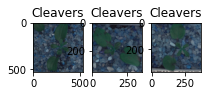

In [4]:
# Part1.1.C. Write a function that will select n random images and display images along with its species.
import matplotlib.pyplot as plt
import seaborn as sns
import random


def display_function(N,df):
    plt.figure(figsize=(N,1))
    for i in range(N):
        plt.subplot(1,N,i+1)
        plt.imshow(df.at[i,'Image_data'])
        plt.title("{}".format(df.at[i,'Class']))
    plt.show()

N = random.randint(0,9)
display_function(N,df1)    
   

#### Part1.2 Data preprocessing [8 Marks]
#### Part1.2.A. Create X & Y from the DataFrame. [2 Marks]

In [5]:
# Part1.2.A. Create X & Y from the DataFrame. [2 Marks]
X = image_data
y = df1['Class']

In [6]:
#Part1.2.B. Encode labels of the images. [2 Marks]
# Encoding the images 
y = pd.get_dummies(y)
y.shape

(4750, 12)

In [7]:
#Part1.2.C. Unify shape of all the images. 
#Part1.2.D.Normalise all the images. [2 Marks]
normalised_X=[]
for image in X: 
    image = np.array(image, dtype = "float32")
    image = cv2.resize(image, (128, 128))
    image = np.reshape(image, (128, 128, 3)) 
    image /= 255.0
    normalised_X.append(np.array(image, dtype = "float32")) 


In [8]:
normalised_X=np.array(normalised_X, dtype = "float32")

In [9]:
normalised_X.shape

(4750, 128, 128, 3)

### Part1.3 Model training [10 Marks]

In [10]:
#Part1.3.A. Split the data into train and test data. [2 Marks]
from sklearn.model_selection import train_test_split
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(normalised_X, y, test_size=.20, random_state=2)

X_nn_train = np.asarray(X_nn_train)
X_nn_test = np.asarray(X_nn_test)
y_nn_train = np.asarray(y_nn_train)
y_nn_test = np.asarray(y_nn_test)

In [20]:
#Part1.3.B. Create new CNN architecture to train the model. [4 Marks]
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D,ReLU
from keras.callbacks import EarlyStopping

%matplotlib inline

model=Sequential()
model.add(BatchNormalization(input_shape=(128,128,3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())

model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))

model.add(Dense(units=12,activation='softmax'))


In [21]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
model.build()

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_11 (Batc (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 128)      

In [ ]:
#Part1.3.C Train the model on train data and validate on test data. [2 Marks]

In [24]:
EPOCH=10
model_cal=model.fit(x=X_nn_train, y=y_nn_train, batch_size=10, epochs= EPOCH, validation_split=0.2)

Train on 3040 samples, validate on 760 samples
Epoch 1/10
3040/3040 [==============================] - 66s 22ms/step - loss: 2.1538 - accuracy: 0.2664 - val_loss: 1.8720 - val_accuracy: 0.3539
Epoch 2/10
3040/3040 [==============================] - 66s 22ms/step - loss: 1.3403 - accuracy: 0.5227 - val_loss: 1.3230 - val_accuracy: 0.5145
Epoch 3/10
3040/3040 [==============================] - 66s 22ms/step - loss: 0.8545 - accuracy: 0.7000 - val_loss: 0.9696 - val_accuracy: 0.6882
Epoch 4/10
3040/3040 [==============================] - 64s 21ms/step - loss: 0.6070 - accuracy: 0.7829 - val_loss: 0.9376 - val_accuracy: 0.6829
Epoch 5/10
3040/3040 [==============================] - 72s 24ms/step - loss: 0.4427 - accuracy: 0.8332 - val_loss: 0.9356 - val_accuracy: 0.7211
Epoch 6/10
3040/3040 [==============================] - 69s 23ms/step - loss: 0.3120 - accuracy: 0.8885 - val_loss: 1.0405 - val_accuracy: 0.7421
Epoch 7/10
3040/3040 [==============================] - 67s 22ms/step - loss:

In [25]:
print(model.evaluate(X_nn_train, y_nn_train))
print(model.evaluate(X_nn_test, y_nn_test))

3800/3800 [==============================] - 32s 8ms/step
[0.3303116594490252, 0.925789475440979]
950/950 [==============================] - 9s 9ms/step
[1.2722967553138733, 0.730526328086853]


In [86]:
#Part1.3.D Select a random image and print actual label and predicted label for the same. [2 Marks]

pred = model.predict(X_nn_test[13:14])
pred[0]

array([3.0936906e-08, 3.1196541e-09, 1.8826055e-08, 4.1746564e-04,
       7.2981017e-08, 4.3776049e-04, 3.6440960e-07, 9.9900961e-01,
       3.4702101e-05, 2.0247342e-06, 3.5314125e-09, 9.7834702e-05],
      dtype=float32)

In [87]:
pred[0].argmax()

7

In [88]:
y_nn_test[13:14].argmax()

7

In [89]:
y_nn_test[13:14]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

#### Note : The prediction is correct 

# Part 2: DOMAIN: Botanical Research
## • CONTEXT: University X is currently undergoing some research involving understanding the characteristics of flowers. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s species from a photo.

## • DATA DESCRIPTION: The dataset comprises of images from 17 plant species.

## • PROJECT OBJECTIVE: To experiment with various approaches to train an image classifier to predict type of flower from the image.

### Steps and tasks: [ Total Score: 30 Marks]


In [1]:
import os
import glob
import itertools

import cv2
from skimage import io

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Part2.1. Import and Understand the data [5 Marks]

In [148]:
# A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Marks]
import tflearn.datasets.oxflower17 as oxflower17

In [151]:
X, y  = oxflower17.load_data()

In [153]:
# PartB.1.B. Print Number of images and shape of the images. [1 Marks]
print(X.shape)
print('Number of images:',X.shape[0])
print('Shape : ', X.shape[1:3])
print('Channels : ', X.shape[3])
print('Target count',y.shape)

(1360, 224, 224, 3)
Number of images: 1360
Shape :  (224, 224)
Channels :  3
Target count (1360,)


In [10]:
# PartB.1.C. Print count of each class from y. [2 Marks]

In [155]:
import pandas as pd
classes=np.unique(y)
nClasses=len(classes)
print('Total number of outputs:',nClasses)
print('Output classes:',classes)

length=len(y)
Zero=One= Two= Three= Four= Five= Six= Seven= Eight= Nine= Ten= 0
Eleven= Twelve= Thirteen= Fourteen= Fifteen= Sixteen= 0

for i in range(length):
    if y[i]==0:
      Zero=Zero+1
    elif y[i]==1:
      One=One+1
    elif y[i]==2:
      Two=Two+1
    elif y[i]==3:
      Three=Three+1
    elif y[i]==4:
      Four=Four+1
    elif y[i]==5:
      Five=Five+1
    elif y[i]==6:
      Six=Six+1
    elif y[i]==7:
      Seven=Seven+1
    elif y[i]==8:
      Eight=Eight+1
    elif y[i]==9:
      Nine=Nine+1
    elif y[i]==10:
      Ten=Ten+1
    elif y[i]==11:
      Eleven=Eleven+1
    elif y[i]==12:
      Twelve=Twelve+1
    elif y[i]==13:
      Thirteen=Thirteen+1
    elif y[i]==14:
      Fourteen=Fourteen+1
    elif y[i]==15:
      Fifteen=Fifteen+1
    elif y[i]==16:
      Sixteen=Sixteen+1

print("class Values:\n",
      "\n0",Zero,
      "\n1",One,
      "\n2",Two,
      "\n3",Three,
      "\n4",Four,
      "\n5",Five,
      "\n6",Six,
      "\n7",Seven,
      "\n8",Eight,
      "\n9",Nine,
      "\n10",Ten,
      "\n11",Eleven,
      "\n12",Twelve,
      "\n13",Thirteen,
      "\n14",Fourteen,
      "\n15",Fifteen,
      "\n16",Sixteen,)

Total number of outputs: 17
Output classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
class Values:
 
0 80 
1 80 
2 80 
3 80 
4 80 
5 80 
6 80 
7 80 
8 80 
9 80 
10 80 
11 80 
12 80 
13 80 
14 80 
15 80 
16 80


In [156]:
from tensorflow.keras.utils import to_categorical
Y_one_hot = to_categorical(y)
Y_one_hot.shape

(1360, 17)

### PartB.2 Image Exploration & Transformation [Learning purpose - Not related to final model] [10 Marks]

[1221, 467, 205, 883, 1275]


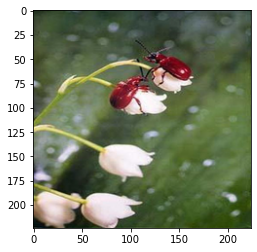

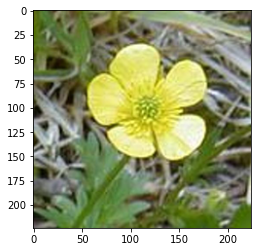

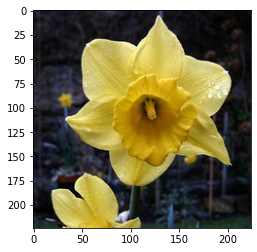

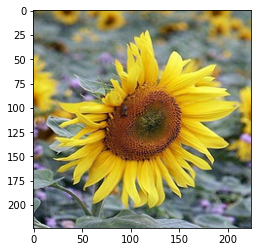

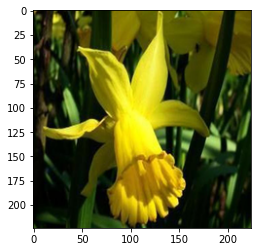

In [157]:
# PartB.2.A Display 5 random images. [1 Marks]
import matplotlib.pyplot as plt
%matplotlib inline

import random
randomlist = []
for i in range(0,5):
    n = random.randint(1,len(X))
    randomlist.append(n)

print(randomlist)

for i in randomlist:
    plt.imshow(X[i])
    plt.show()
    

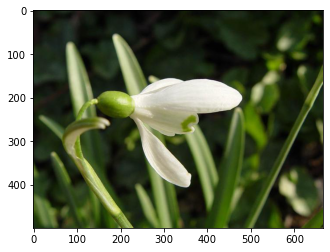

In [158]:
## PartB.2.B Select any image from the dataset and assign it to a variable. [1 Marks]
import cv2

from PIL import Image, ImageOps, ImageFilter

path='./17flowers/jpg/1/image_0081.jpg'
image_original = Image.open(path)

plt.imshow(image_original)
plt.show()

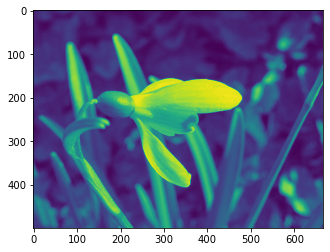

In [159]:
# PartB.2.C. Transform the image into grayscale format and display the same. [3 Marks]
gray_image = ImageOps.grayscale(image_original)
plt.imshow(gray_image)
plt.show()

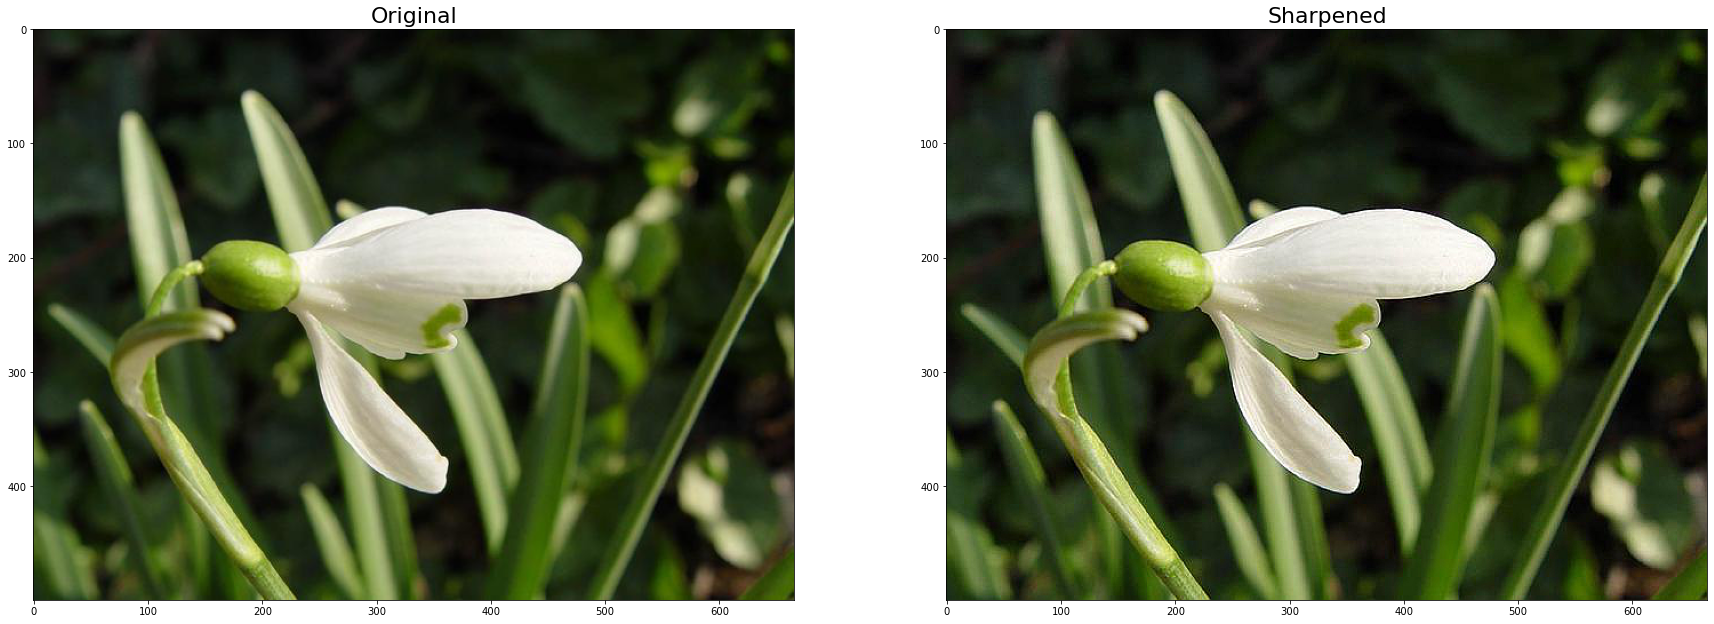

In [160]:
# PartB.2.D. Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks]
from PIL.ImageFilter import ( SHARPEN )
sharpen_image = image_original.filter(SHARPEN)

plt.figure(figsize =(30, 30))
plt.subplot(1, 2, 1)
plt.title('Original', fontsize = 22)
plt.imshow(image_original)
plt.subplot(1, 2, 2)
plt.title('Sharpened', fontsize = 22)
plt.imshow(sharpen_image)
plt.show()

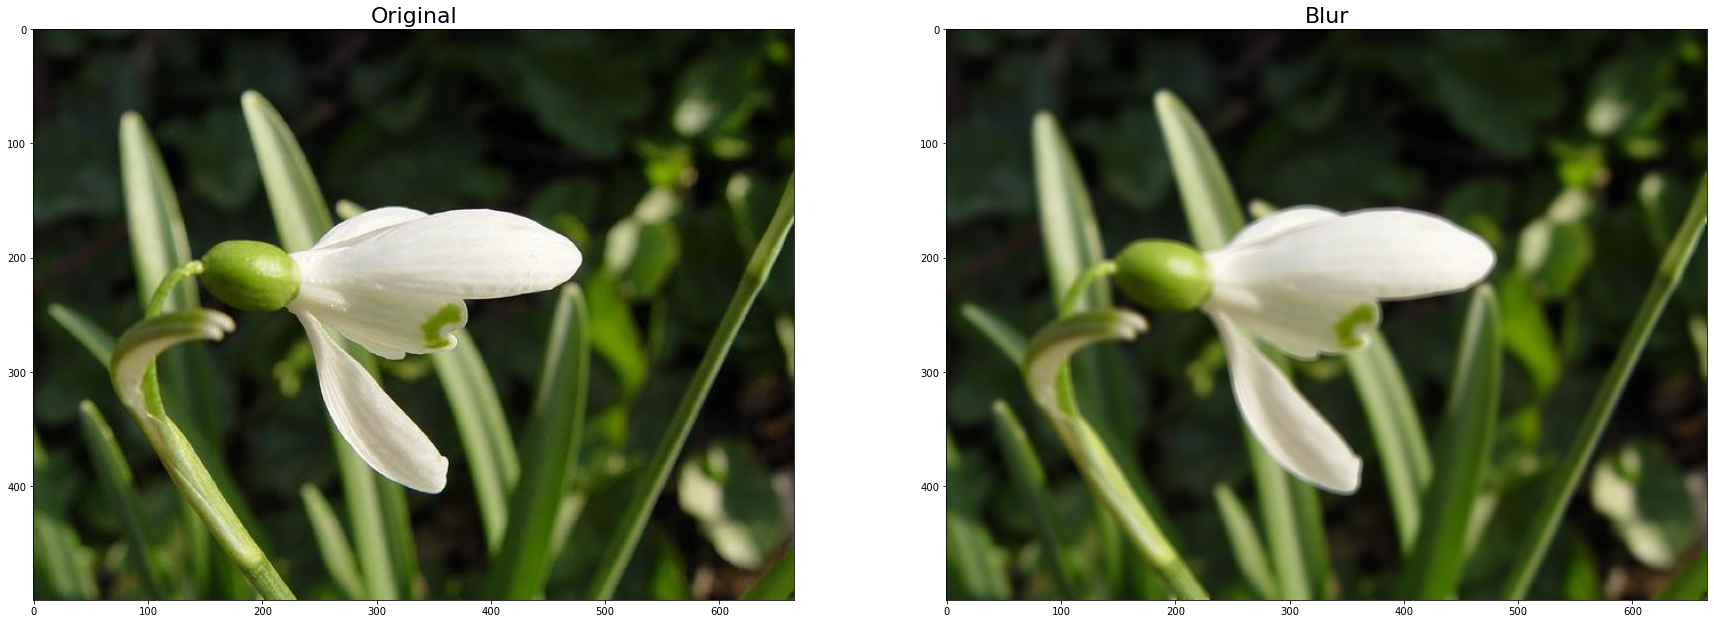

In [161]:
# PartB.2.E. Apply a filter to blur the image and display the image before and after blur. [2 Marks]
from PIL.ImageFilter import ( BLUR )
blur_image = image_original.filter(BLUR)

plt.figure(figsize =(30, 30))
plt.subplot(1, 2, 1)
plt.title('Original', fontsize = 22)
plt.imshow(image_original)
plt.subplot(1, 2, 2)
plt.title('Blur', fontsize = 22)
plt.imshow(blur_image)
plt.show()

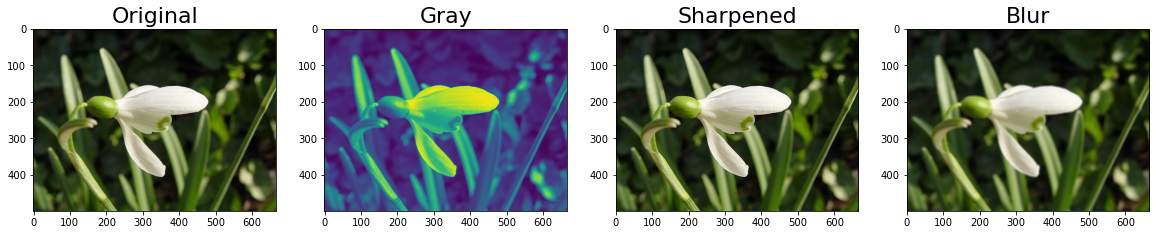

In [162]:
# PartB.2.F. Display all the 4 images from above questions besides each other to observe the difference. [1 Marks]

plt.figure(figsize =(20, 20))
plt.subplot(1, 4, 1)
plt.title('Original', fontsize = 22)
plt.imshow(image_original)

plt.subplot(1, 4, 2)
plt.title('Gray', fontsize = 22)
plt.imshow(gray_image)

plt.subplot(1, 4, 3)
plt.title('Sharpened', fontsize = 22)
plt.imshow(sharpen_image)


plt.subplot(1, 4, 4)
plt.title('Blur', fontsize = 22)
plt.imshow(blur_image)
plt.show()

### PartB.3. Model training and Tuning: [15 Marks]

In [166]:
#PartB.3.A. Split the data into train and test with 80:20 proportion. [2 Marks]
from sklearn.model_selection import train_test_split

t_X,test_X,t_Y,test_Y = train_test_split(X,Y_one_hot,test_size=0.2,random_state=5)

train_X,valid_X,train_Y,valid_Y = train_test_split(t_X,t_Y,test_size=0.2,random_state=5)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
valid_X = valid_X.astype('float32')
#Normatlisation
train_X = train_X/255.
test_X = test_X/255.
valid_X = valid_X/255.

In [167]:
#PartB.3.B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]

from sklearn.model_selection import train_test_split
SL_TRAIN_X,SL_TEST_X,SL_TRAIN_Y,SL_TEST_Y= train_test_split( X , y ,test_size=0.2,random_state=5)


SL_Train_X,SL_Valid_X,SL_Train_Y,SL_Valid_Y= train_test_split( SL_TRAIN_X , SL_TRAIN_Y ,test_size=0.2,random_state=5)


#Flatten the Image

# Train data
x_train_SL = []
for i in range(870):
      x_train_SL.append(SL_Train_X[i,:].flatten())

# Test data
x_test_SL = []
for i in range(218):
      x_test_SL.append(SL_Valid_X[i,:].flatten())


# Shape of data

print("\n Training data",len(x_train_SL))
print("\n Training Target data",len(SL_Train_Y))
print("\n Test data",len(x_test_SL))
print("\n Testing target data",len(SL_Valid_Y))


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_RF = RandomForestClassifier(n_estimators=100, 
                                  criterion='gini', 
                                  max_depth=None,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0, 
                                  max_features='auto',
                                  max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=None, 
                                  bootstrap=True, 
                                  oob_score=False, 
                                  n_jobs=None, 
                                  random_state=None, 
                                  verbose=0, 
                                  warm_start=False,
                                  class_weight=None,
                                  ccp_alpha=0.0, 
                                  max_samples=None)
model_RF.fit(x_train_SL, SL_Train_Y)

#Accuracy
pred_RF = model_RF.predict(x_test_SL)
RF_Train = model_RF.score(x_train_SL,SL_Train_Y)
RF_Test = accuracy_score(SL_Valid_Y,pred_RF)     


print("\nRandom Forest: Train Accuracy",RF_Train)
print("\nRandom Forest: Test Accuracy",RF_Test)



 Training data 870

 Training Target data 870

 Test data 218

 Testing target data 218

Random Forest: Train Accuracy 1.0

Random Forest: Test Accuracy 0.42660550458715596


### Random Forest test accuracy is very low

In [43]:
#PartB.3.C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]

In [172]:
# Neural Network Classifier

NN_train_X=SL_Train_X.reshape(SL_Train_X.shape[0],150528) # 224, 224, 3 
NN_test_X=SL_Valid_X.reshape(SL_Valid_X.shape[0],150528)


#Normalising
NN_train_X = NN_train_X/255.0
NN_test_X = NN_test_X/255.0


print('Training Set',NN_train_X.shape,train_Y.shape)
print('Test Set',NN_test_X.shape,test_Y.shape)

from keras.utils import np_utils
NN_y_train = np_utils.to_categorical(SL_Train_Y)
NN_y_test = np_utils.to_categorical(SL_Valid_Y)

num_classes = NN_y_test.shape[1]

#Model Creation
from tensorflow.keras import  losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import  Dropout,MaxPooling2D
from tensorflow.keras.layers import  BatchNormalization
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense


def nn_model():
    model = Sequential()
    model.add(BatchNormalization(input_shape=(150528,)))

    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(17, activation='softmax'))

    #model Compile
    sgd = optimizers.Adam(lr=1e-3)
    model.compile(loss = losses.categorical_crossentropy,optimizer=sgd,metrics=['accuracy'])
    return model

model= nn_model()

model.fit(NN_train_X, NN_y_train, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Training Set (870, 150528) (870, 17)
Test Set (218, 150528) (272, 17)
Train on 696 samples, validate on 174 samples
Epoch 1/10
696/696 - 3s - loss: 2.7396 - acc: 0.1135 - val_loss: 2.8095 - val_acc: 0.1207 - 3s/epoch - 5ms/sample
Epoch 2/10
696/696 - 2s - loss: 1.9088 - acc: 0.3994 - val_loss: 2.8113 - val_acc: 0.1034 - 2s/epoch - 3ms/sample
Epoch 3/10
696/696 - 2s - loss: 1.3089 - acc: 0.6365 - val_loss: 2.7774 - val_acc: 0.0977 - 2s/epoch - 3ms/sample
Epoch 4/10
696/696 - 2s - loss: 0.8325 - acc: 0.7802 - val_loss: 2.7835 - val_acc: 0.0920 - 2s/epoch - 3ms/sample
Epoch 5/10
696/696 - 2s - loss: 0.4954 - acc: 0.8951 - val_loss: 2.8374 - val_acc: 0.0747 - 2s/epoch - 3ms/sample
Epoch 6/10
696/696 - 2s - loss: 0.2824 - acc: 0.9526 - val_loss: 2.9792 - val_acc: 0.1092 - 2s/epoch - 3ms/sample
Epoch 7/10
696/696 - 2s - loss: 0.1570 - acc: 0.9842 - val_loss: 3.0471 - val_acc: 0.0690 - 2s/epoch - 3ms/sample
Epoch 8/10
696/696 - 2s - loss: 0.0940 - acc: 0.9871 - val_loss: 3.0727 - val_acc: 0.0

### Overfitting Validation accuracy very low

In [174]:
# Test accuracy 

print(model.evaluate(NN_train_X, NN_y_train))
print(model.evaluate(NN_test_X, NN_y_test))

[3.0640998144259397, 0.05172414]
[3.1569662750314134, 0.08715596]


In [175]:
# PartB.3.D Train a model using a basic CNN and share performance metrics on test data. [4 Marks]

import tensorflow as tf
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers, losses
import numpy as np
np.random.seed(1000)
from tensorflow.keras import optimizers



CNN_model = Sequential()
# Initialize the model

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
CNN_model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))

# Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'relu' 
CNN_model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
CNN_model.add(Dropout(rate=0.2))

# Flatten the layer
CNN_model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
CNN_model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 17 units and activation function as 'softmax'
CNN_model.add(Dense(17, activation="softmax"))



CNN_model.compile(loss = 'binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['accuracy'])

CNN_model.summary()

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.3,
                                     rotation_range=50, 
                                     width_shift_range=0.2, 
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     horizontal_flip=True,fill_mode='nearest')


val_datagen =ImageDataGenerator(rescale=1./255)

train_generator =train_datagen.flow(train_X,train_Y,batch_size=30)
val_generator =train_datagen.flow(valid_X,valid_Y,batch_size=30)
epochs=1
history= CNN_model.fit(train_generator,
                             steps_per_epoch=30,
                             epochs=epochs,
                             validation_data=val_generator,
                             validation_steps=50,
                             verbose=1)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_35 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 110, 110, 64)     0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 flatten_15 (Flatten)        (None, 774400)            0         
                                                                 
 dense_109 (Dense)           (None, 128)               99123328  
                                                     

/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


30/30 [==============================] - 126s 4s/step - batch: 14.5000 - size: 30.0000 - loss: 0.2980 - acc: 0.9412 - val_loss: 0.2243 - val_acc: 0.9412


### Validation loss less and validation accuracy also good

In [220]:
# Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]
import cv2
#read prediction image
test_image_o = cv2.imread(r'./Prediction.jpg')
# Resize the image to 224X224 shape to be compatible with the model
test_image = cv2.resize(test_image_o, (224, 224))

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1/255.0


#Check the size of the Image array again
print('After expand_dims: '+ str(test_image.shape))


y_pred=CNN_model.predict(test_image)
answer=np.argmax(y_pred)
print("Classification is :",answer)

After expand_dims: (1, 224, 224, 3)
Classification is : 16
